In [1]:
import numpy as np;
import pandas as pd;
import matplotlib.pyplot  as plt;
from sklearn.model_selection  import train_test_split
from sklearn.linear_model  import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix
import pickle

In [2]:
import seaborn as sns

In [3]:
dataset=pd.read_csv("Mall_Customers.csv")

In [4]:
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
dataset.rename(columns={'Genre':'Gender'},inplace=True)

In [6]:
dataset.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [8]:
dataset.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [9]:
dataset.shape

(200, 5)

In [10]:
dataset.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [11]:
#drop unwanted data ---data that will not affect the result

In [12]:
dataset.drop(['CustomerID'],axis=1,inplace=True)

In [13]:
dataset.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


/home/admin1/anaconda3/envs/customer/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


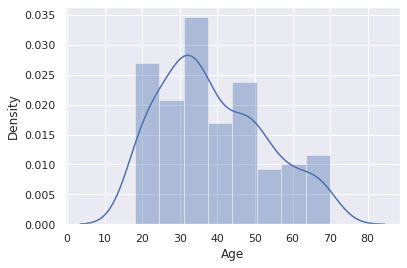

In [14]:
import seaborn as sns, numpy as np
sns.set_theme()
#np.random.seed(0)
x = dataset['Age']
ax = sns.distplot(x)

/home/admin1/anaconda3/envs/customer/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


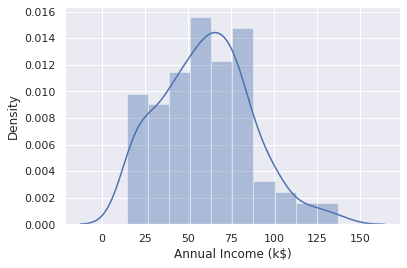

In [15]:
import seaborn as sns, numpy as np
sns.set_theme()
#np.random.seed(0)
x = dataset['Annual Income (k$)']
ax = sns.distplot(x)

/home/admin1/anaconda3/envs/customer/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


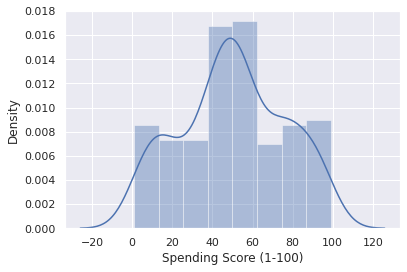

In [16]:
import seaborn as sns, numpy as np
sns.set_theme()
#np.random.seed(0)
x = dataset['Spending Score (1-100)']
ax = sns.distplot(x)

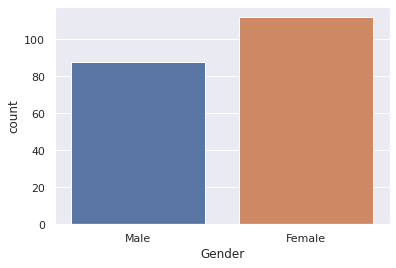

In [17]:
import seaborn as sns
sns.set_theme(style="darkgrid")
#titanic = sns.load_dataset("titanic")
ax = sns.countplot(x="Gender", data=dataset)

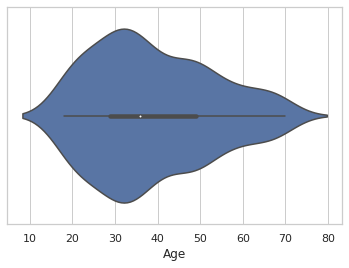

In [18]:
import seaborn as sns
sns.set_theme(style="whitegrid")

ax = sns.violinplot(x=dataset["Age"])

In [19]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


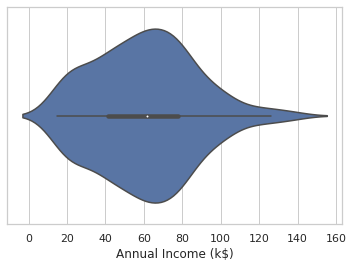

In [20]:
import seaborn as sns
sns.set_theme(style="whitegrid")

ax = sns.violinplot(x=dataset["Annual Income (k$)"])

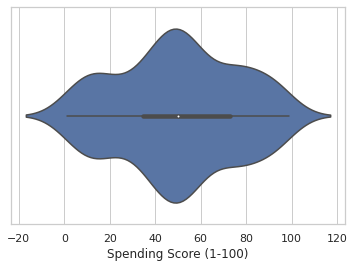

In [21]:
import seaborn as sns
sns.set_theme(style="whitegrid")

ax = sns.violinplot(x=dataset["Spending Score (1-100)"])

In [22]:
age_18_25=dataset.Age[(dataset.Age >=18)&(dataset.Age <= 25)]
age_25_35=dataset.Age[(dataset.Age >=26)&(dataset.Age <= 35)]
age_36_45=dataset.Age[(dataset.Age >=36)&(dataset.Age <= 45)]
age_46_55=dataset.Age[(dataset.Age >=46)&(dataset.Age <= 55)]
age_56_above=dataset.Age[(dataset.Age >=56)&(dataset.Age <= 100)]

In [23]:
#to get the details of the particular age group customers

In [24]:
len(age_18_25),len(age_18_25),len(age_36_45),len(age_46_55),len(age_56_above)

(38, 38, 36, 37, 29)

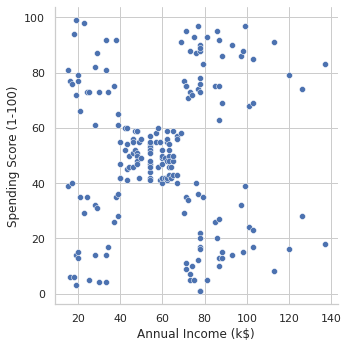

In [26]:
sns.relplot( x=dataset["Annual Income (k$)"], y=dataset["Spending Score (1-100)"])

In [27]:
x1=dataset.loc[:,["Age","Spending Score (1-100)"]].values

In [28]:
x1[0:10]

array([[19, 39],
       [21, 81],
       [20,  6],
       [23, 77],
       [31, 40],
       [22, 76],
       [35,  6],
       [23, 94],
       [64,  3],
       [30, 72]])

In [29]:
from sklearn.cluster import KMeans

In [30]:
wcss=[]

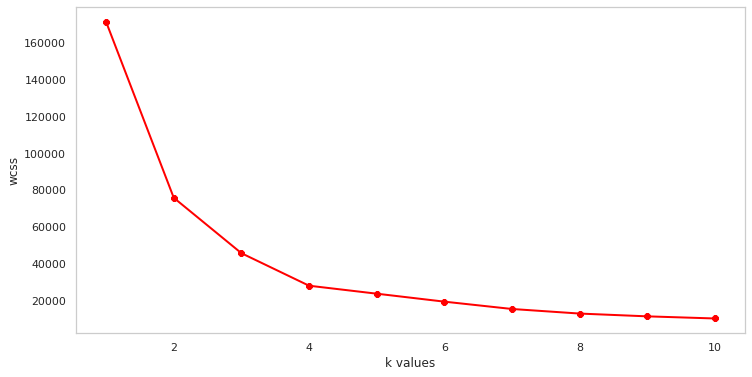

In [31]:
wcss=[]
for k in range(1,11):
    kmeans=KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(x1)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))
plt.grid()
plt.plot(range(1,11),wcss,linewidth=2,color='red',marker="8")
plt.xlabel("k values")
plt.ylabel("wcss")
plt.show()
    

In [32]:
kmeans=KMeans(n_clusters=4)
label=kmeans.fit_predict(x1)
print(label)

[3 1 2 1 3 1 2 1 2 1 2 1 2 1 2 1 3 3 2 1 3 1 2 1 2 1 2 3 2 1 2 1 2 1 2 1 2
 1 2 1 0 1 0 3 2 3 0 3 3 3 0 3 3 0 0 0 0 0 3 0 0 3 0 0 0 3 0 0 3 3 0 0 0 0
 0 3 0 3 3 0 0 3 0 0 3 0 0 3 3 0 0 3 0 3 3 3 0 3 0 3 3 0 0 3 0 3 0 0 0 0 0
 3 3 3 3 3 0 0 0 0 3 3 3 1 3 1 0 1 2 1 2 1 3 1 2 1 2 1 2 1 2 1 3 1 2 1 0 1
 2 1 2 1 2 1 2 1 2 1 2 1 0 1 2 1 2 1 2 1 2 3 2 1 2 1 2 1 2 1 2 1 2 1 2 1 3
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1]


In [33]:
print(kmeans.cluster_centers_)

[[55.70833333 48.22916667]
 [30.1754386  82.35087719]
 [43.29166667 15.02083333]
 [27.61702128 49.14893617]]


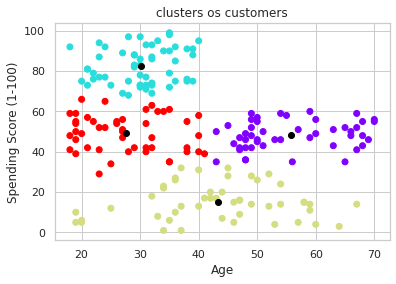

In [34]:
plt.scatter(x1[:,0],x1[:,1],c=kmeans.labels_,cmap="rainbow")
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color="black")
plt.title("clusters os customers")
plt.xlabel("Age")
plt.ylabel("Spending Score (1-100)")
plt.show()

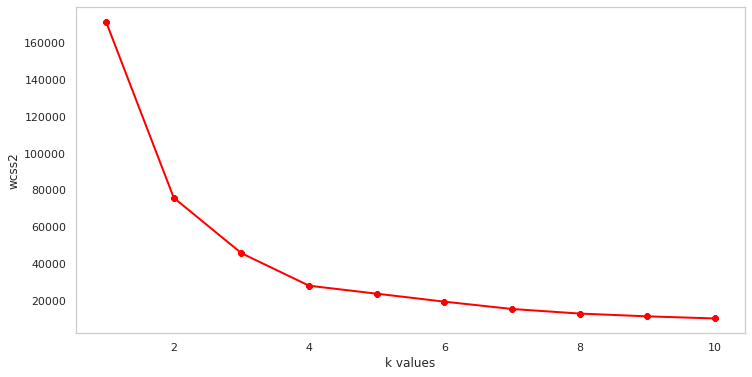

In [35]:
x2=dataset.loc[:,["Annual Income (k$)","Spending Score (1-100)"]].values
wcss2=[]
for k in range(1,11):
    kmeans=KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(x2)
    wcss2.append(kmeans.inertia_)
plt.figure(figsize=(12,6))
plt.grid()
plt.plot(range(1,11),wcss,linewidth=2,color='red',marker="8")
plt.xlabel("k values")
plt.ylabel("wcss2")
plt.show()

In [36]:
kmeans=KMeans(n_clusters=5)
label=kmeans.fit_predict(x2)
print(label)

[4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 4 2 4 1 4 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 3 0 3 1 3 0 3 0 3 1 3 0 3 0 3 0 3 0 3 1 3 0 3 0 3
 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0
 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3]


In [37]:
print(kmeans.cluster_centers_)

[[88.2        17.11428571]
 [55.2962963  49.51851852]
 [25.72727273 79.36363636]
 [86.53846154 82.12820513]
 [26.30434783 20.91304348]]


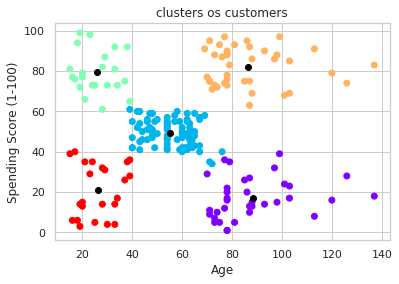

In [38]:
plt.scatter(x2[:,0],x2[:,1],c=kmeans.labels_,cmap="rainbow")
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color="black")
plt.title("clusters os customers")
plt.xlabel("Age")
plt.ylabel("Spending Score (1-100)")
plt.show()

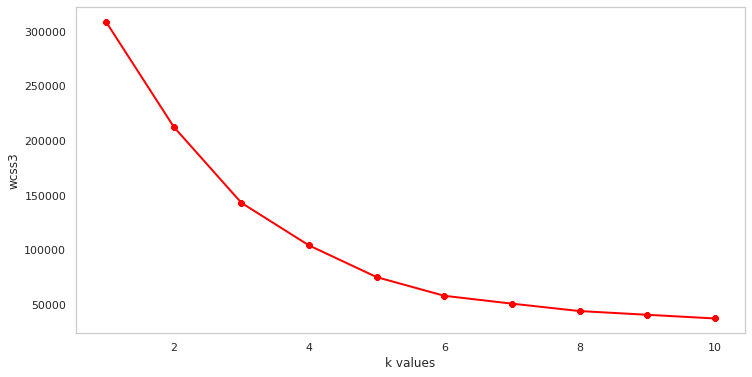

In [39]:
x3=dataset.loc[:,["Age","Annual Income (k$)","Spending Score (1-100)"]].values

wcss3=[]
for k in range(1,11):
    kmeans=KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(x3)
    wcss3.append(kmeans.inertia_)
plt.figure(figsize=(12,6))
plt.grid()
plt.plot(range(1,11),wcss3,linewidth=2,color='red',marker="8")
plt.xlabel("k values")
plt.ylabel("wcss3")
plt.show()

In [40]:
kmeans=KMeans(n_clusters=5)
label=kmeans.fit_predict(x3)
print(label)


print(len(label))

[3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3
 0 3 0 3 0 3 0 3 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 4 2 1 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 1 2 4 2 4 2
 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2]
200


In [41]:
print(kmeans.cluster_centers_)

[[25.52173913 26.30434783 78.56521739]
 [43.08860759 55.29113924 49.56962025]
 [32.69230769 86.53846154 82.12820513]
 [45.2173913  26.30434783 20.91304348]
 [40.66666667 87.75       17.58333333]]


In [42]:
#plt.scatter(x3[:,0],x3[:,1],c=kmeans.labels_,cmap="rainbow")
#plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color="black")
#plt.title("clusters os customers")
#plt.xlabel("Age")
#plt.ylabel("Spending Score (1-100)")
#plt.show()

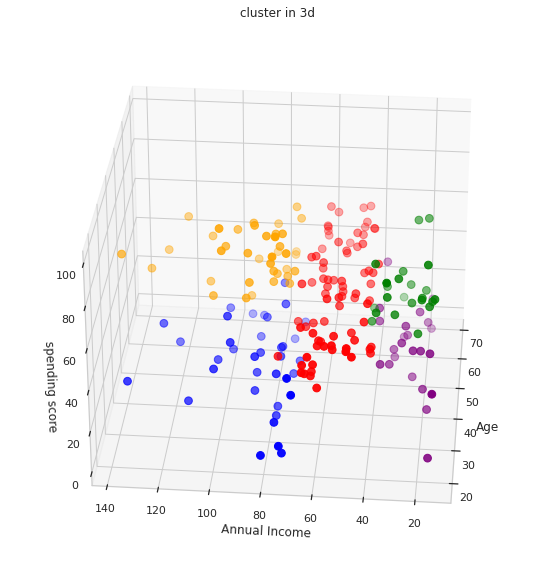

In [58]:
clusters=kmeans.fit_predict(x3)
dataset["label"]=clusters

from mpl_toolkits.mplot3d import Axes3D
fig=plt.figure(figsize=(20,10))
ax=fig.add_subplot(111,projection="3d")
ax.scatter(dataset.Age[dataset.label==0],dataset["Annual Income (k$)"][dataset.label==0],dataset["Spending Score (1-100)"][dataset.label==0],c="blue",s=60)
ax.scatter(dataset.Age[dataset.label==1],dataset["Annual Income (k$)"][dataset.label==1],dataset["Spending Score (1-100)"][dataset.label==1],c="red",s=60)
ax.scatter(dataset.Age[dataset.label==2],dataset["Annual Income (k$)"][dataset.label==2],dataset["Spending Score (1-100)"][dataset.label==2],c="green",s=60)
ax.scatter(dataset.Age[dataset.label==3],dataset["Annual Income (k$)"][dataset.label==3],dataset["Spending Score (1-100)"][dataset.label==3],c="orange",s=60)
ax.scatter(dataset.Age[dataset.label==4],dataset["Annual Income (k$)"][dataset.label==4],dataset["Spending Score (1-100)"][dataset.label==4],c="purple",s=60)
ax.view_init(30,185)
plt.xlabel("Age")
plt.ylabel("Annual Income ")
ax.set_zlabel("spending score")
plt.title("cluster in 3d ")
plt.show()

In [124]:
def user_data(age,annual_income,spending_score):
    


                                     x3[0]=[age,annual_income,spending_score]
                                     #print(x3)
                                     kmeans=KMeans(n_clusters=5)
                                     label=kmeans.fit_predict(x3)
                                     #print(label[0])
                                     return  label[0]


#print(len(label))

In [125]:
#kmeans=KMeans(n_clusters=5)
#label=kmeans.fit_predict(x3)
#print(label[0])


#print(len(label))




In [126]:
#age1= input ("EnterAge :")

#annual_income1= input("Enter Annual income : ")

#spending_score1 = input("Enter Spending score: ")
#print(age1,annual_income1,spending_score1)

In [129]:
age1= input ("EnterAge :")

annual_income1= input("Enter Annual income : ")

spending_score1 = input("Enter Spending score: ")
#print(age1,annual_income1,spending_score1)
result1=user_data(age1,annual_income1,spending_score1)

#print(result1)
if result1==0:
    print("customer of clas 1")
elif result1==1:
    print("customer is of class 4")
elif result1==2:
    print("customer is of class 3")
elif result1==3:
    print("customer is of class 4")
    
else:
    print("customer is of class 5")

EnterAge :45
Enter Annual income : 56
Enter Spending score: 88
customer is of class 4
